In [27]:
import numpy as np
import pandas as pd
import json
import urllib.request
import seaborn as sns
import matplotlib.pyplot as plt

####Getting data of popular cryptocurrencies 

In [28]:
symbols = ['USDT_BTC', 'USDT_ETH', 'USDT_XRP', 'USDT_BCH', 'USDT_XMR', 'USDT_DASH']   ###Fair comparison as all their base are the same
data=pd.DataFrame([])
frequency=14400
for symbol in symbols:
    url ='https://poloniex.com/public?command=returnChartData&currencyPair='+symbol+'&end=9999999999&period='+str(frequency)+'&start=0'
    t=urllib.request.urlopen(url)
    df=pd.read_json(url)
    df=df[1:]
    df['symbol']=symbol
    print(np.shape(df))
    data=data.append(df)
    print(np.shape(data))

(6990, 9)
(6990, 9)
(5973, 9)
(12963, 9)
(6983, 9)
(19946, 9)
(1552, 9)
(21498, 9)
(7006, 9)
(28504, 9)
(7006, 9)
(35510, 9)


####closing price of cryptocurrencies plot

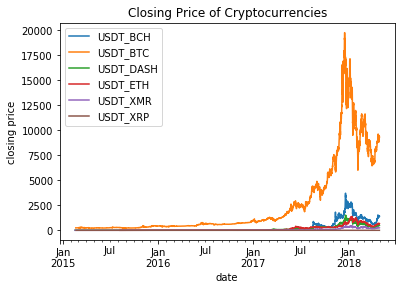

In [29]:
fig, ax=plt.subplots(1,1)
data.groupby('symbol').plot(x='date', y='close', ax=ax)
plt.xlabel('date')
plt.ylabel('closing price')
plt.title('Closing Price of Cryptocurrencies')
plt.gca().legend(data.groupby(['symbol']).groups.keys())

In [30]:
ned=data

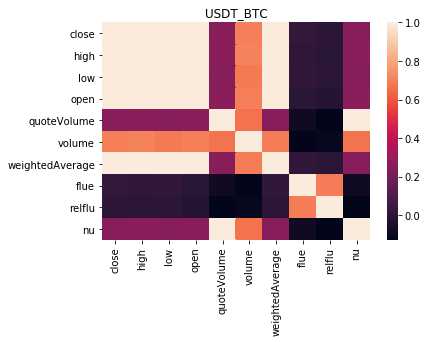

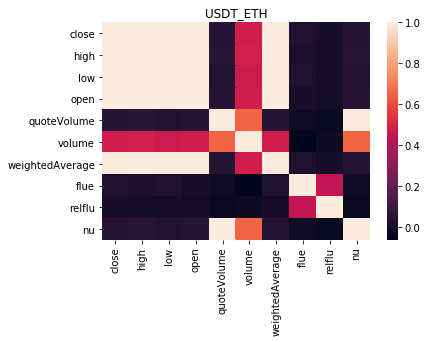

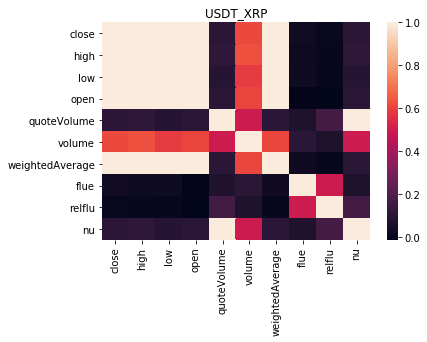

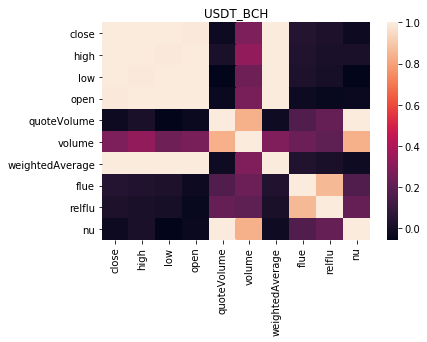

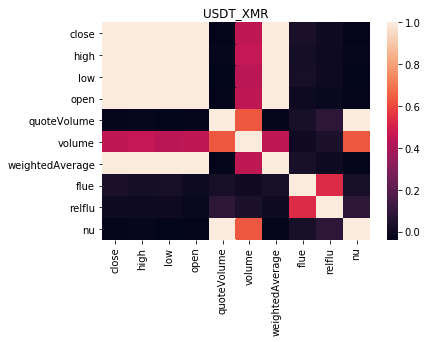

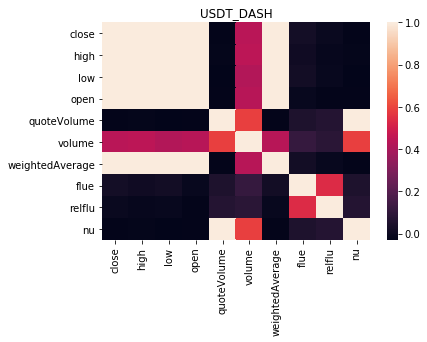

In [31]:
for symbol in symbols:
    eachp=ned[(ned['symbol']==symbol) & (ned['volume']>80)] 
    #sns.heatmap(eachp.corr())
    pd.to_numeric(eachp['volume'])
    each=eachp[1:]
    each=each.assign(flue=np.diff(eachp['weightedAverage']))
    each=each.assign(relflu=each['flue']/each['weightedAverage'])  ###relative fluctuation
    each=each.assign(nu=each['volume']/each['weightedAverage'])     
    plt.figure()
    sns.heatmap(each.corr())
    plt.title(symbol)

In [32]:
each['volume'].corr(each['flue'])

0.11904285626244429

In [33]:
each['volume'].corr(each['close']) 

0.43735124832809663

In [34]:
each['close'].corr(each['relflu'])

-0.003854322251540178

In [35]:
each['volume'].corr(each['quoteVolume'])

0.5862245781235951

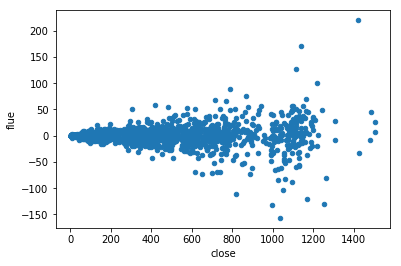

In [36]:
each.plot('close', 'flue', kind='scatter')

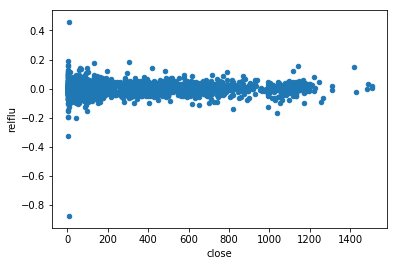

In [37]:
each.plot('close', 'relflu', kind='scatter')